In [2]:
library("stats")
library("WaveletComp")
library("timeDate")
library("pracma")

# I/O

In [14]:
# fname_river_stage = "~/Dropbox/PNNL/Projects/Reach_scale_model/data/MASS1/transient_1976_2016/mass1_186.csv"
fname_river_bc_6h = "/global/project/projectdirs/m1800/pin/Reach_scale_model/Inputs/river_bc/bc_6h_smooth_032807/"
fname_river_bc_1w = "/global/project/projectdirs/m1800/pin/Reach_scale_model/Inputs/river_bc/bc_1w_smooth_032807/"
fname_river_bc_7d = "/global/project/projectdirs/m1800/pin/Reach_scale_model/Inputs/river_bc/bc_7d_smooth_032807/"

fig_fft = "/global/project/projectdirs/m1800/pin/Reach_scale_model/Outputs/river_stage/river_stage_fft.jpg"

data_dir = "/global/project/projectdirs/m1800/pin/Reach_scale_model/data/MASS1/transient_1976_2016/"

fig_wavelet = "/global/project/projectdirs/m1800/pin/Reach_scale_model/Outputs/river_stage/"

fig_dir = "/global/project/projectdirs/m1800/pin/Reach_scale_model/figures/"

fname_flux_array_6h = "/global/project/projectdirs/m1800/pin/Reach_scale_model/results/HFR_model_100x100x2_1w_bc/flux_array_6h.csv"
fname_flux_array_1w = "/global/project/projectdirs/m1800/pin/Reach_scale_model/results/HFR_model_100x100x2_1w_bc/flux_array_1w.csv"


In [4]:
time.ticks = as.POSIXct(paste(as.character(1985:2088),"-01-01",sep=""),
                        tz="GMT",format="%Y-%m-%d")

time.tick.labels = strftime(time.ticks, format = "%Y", tz= "GMT")

simu.start = as.POSIXct("2007-03-28 12:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
start.time = as.POSIXct("2011-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2016-01-01 00:00:00", tz="GMT",format="%Y-%m-%d %H:%M:%S")

## import flux array

In [5]:
flux_array_6h = read.csv(fname_flux_array_6h, stringsAsFactors = F, header = F, col.names = as.character(40:332))
flux_array_1w = read.csv(fname_flux_array_1w, stringsAsFactors = F, header = F, col.names = as.character(40:332))

time_index = seq(as.POSIXct("2010-12-7 12:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S"), 
    as.POSIXct("2015-12-31 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S"), by = "6 h")

In [11]:
# upstream:X50, midstream:X180, downstream:X308
imass = "X50"
flux_mass1_6h = data.frame("date" = time_index, "flux" = flux_array_6h[, imass])
flux_mass1_1w = data.frame("date" = time_index, "flux" = flux_array_1w[, imass])

## plot flux time series

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”

jpeg 
   3

png 
  2

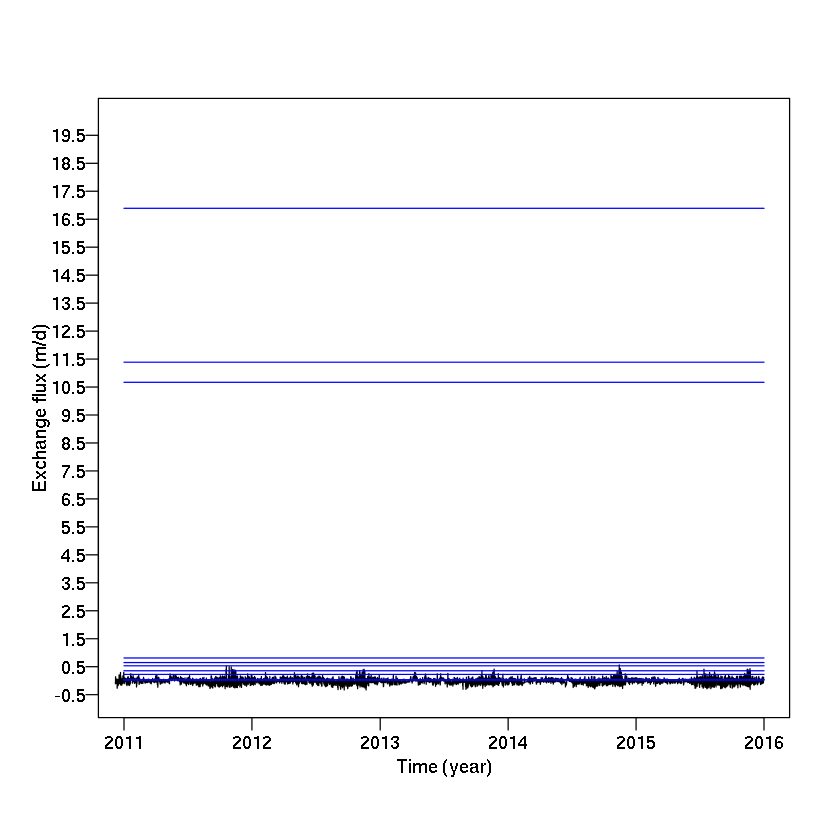

In [19]:
plot(flux_mass1_6h$date, flux_mass1_6h$flux, col='black', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     ylim = c(-0.5, 20),
#      log='y',
     type="l")

box()

for (iflux in c(10.66805856,0.64741248,0.02954016,16.88961888,11.387304,0.03269376,0.0269136,0.53231904,0.81241056,0.22464864,0.35433504)) {
    
    lines(c(start.time, end.time), c(iflux, iflux), col='blue', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     ylim = c(-0.5, 20),
     type="l")
}


mtext("Exchange flux (m/d)",2,line=2)
mtext("Time (year)",1,line=1.5)

axis.POSIXct(1,at=time.ticks, format="%Y",tck=-0.02,mgp=c(1,0.5,0));
axis(2,seq(-0.5, 20, 1),las=1,mgp=c(3,0.5,0),tck=-0.02);   


# legend("topright",legend = c("Sub-daily Case","Weekly Case"), col = c("lightskyblue", "blue"), lty = c("solid", "solid"), bty = "n")

fname = paste(fig_dir, 'exchange_flux_NEXSS.jpg', sep = "")
dev.copy(jpeg, width=8,height=8,units='in',res=300, quality=100, file = fname)
dev.off()

## import river stage

In [28]:
fname_well = paste(data_dir, "mass1_40.csv", sep = "")

In [29]:
well_df = read.csv(fname_well, stringsAsFactors = F)
well_df$date = as.POSIXct(well_df$date, format = "%Y-%m-%d %H:%M:%S", tz = "GMT") 
well_df$stage = well_df$stage + 1.039
well_df_data = well_df[which( well_df$date >= start.time & well_df$date <= end.time), ]
well_df_data = well_df_data[, c('date', 'stage')]

In [16]:
iDatum = "DatumH_Mass1_183.txt"

Mass1_6h = read.table(paste(fname_river_bc_6h, iDatum, sep=""))
Mass1_1w = read.table(paste(fname_river_bc_1w, iDatum, sep=""))
Mass1_7d = read.table(paste(fname_river_bc_7d, iDatum, sep=""))

river_stage_6h = data.frame("date" = simu.start + as.numeric(Mass1_6h[,1]), "stage" = Mass1_6h[,4])
river_stage_1w = data.frame("date" = simu.start + as.numeric(Mass1_1w[,1]), "stage" = Mass1_1w[,4])
river_stage_7d = data.frame("date" = simu.start + as.numeric(Mass1_7d[,1]), "stage" = Mass1_7d[,4])

In [17]:
river_stage_6h = river_stage_6h[which( river_stage_6h$date >= start.time & river_stage_6h$date <= end.time), ]
river_stage_1w = river_stage_1w[which( river_stage_1w$date >= start.time & river_stage_1w$date <= end.time), ]
river_stage_7d = river_stage_7d[which( river_stage_7d$date >= start.time & river_stage_7d$date <= end.time), ]

## FFT for river stage

In [21]:
river_stage_6h_fft = spectrum(river_stage_6h$stage, log="no", plot="FALSE")
sampling_intervel=1 # in hour
spx_6h = river_stage_6h_fft$freq/sampling_intervel
spy_6h = 2*river_stage_6h_fft$spec

river_stage_1w_fft = spectrum(river_stage_1w$stage, log="no", plot="FALSE")
sampling_intervel=1 # in hour
spx_1w = river_stage_1w_fft$freq/sampling_intervel
spy_1w = 2*river_stage_1w_fft$spec

In [22]:
river_stage_7d_fft = spectrum(river_stage_7d$stage, log="no", plot="FALSE")
sampling_intervel=1 # in hour
spx_7d = river_stage_7d_fft$freq/sampling_intervel
spy_7d = 2*river_stage_7d_fft$spec

## FFT for flux

In [148]:
flux_mass1_6h_fft = spectrum(flux_mass1_6h$flux, log="no", plot="FALSE")
sampling_intervel= 6 # in hour
flux_spx_6h = flux_mass1_6h_fft$freq/sampling_intervel
flux_spy_6h = 2*flux_mass1_6h_fft$spec

flux_mass1_1w_fft = spectrum(flux_mass1_1w$flux, log="no", plot="FALSE")
sampling_intervel= 6 # in hour
flux_spx_1w = flux_mass1_1w_fft$freq/sampling_intervel
flux_spy_1w = 2*flux_mass1_1w_fft$spec

In [7]:
# period_6h = 1/spx_6h/24 # convert frequecy to period (in days)
# period_1w = 1/spx_1w/24 # convert frequecy to period (in days)

# plot river stage with FFT

jpeg 
   3

png 
  2

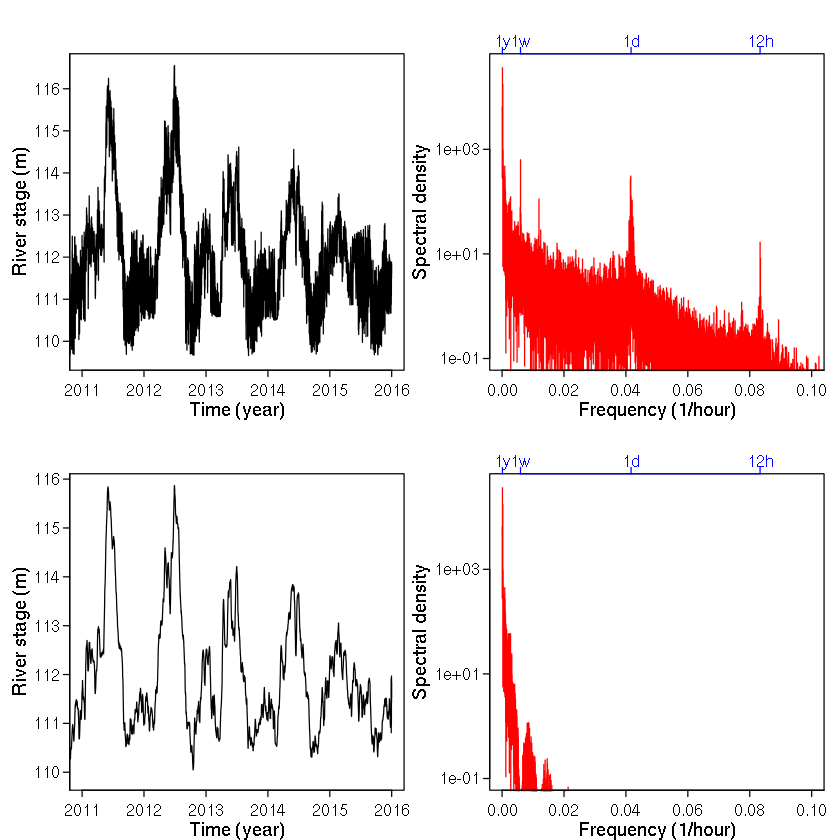

In [9]:
# pdf(file=fig_fft,width=10,height=6)
par(mar=c(2.5,3.5,2.7,0.8),mfrow=c(2, 2))

# plot(1,1)
plot(river_stage_6h$datetime, river_stage_6h$stage, col='black', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     type="l")

box()
mtext("River stage (m)",2,line=2)
mtext("Time (year)",1,line=1.5)
axis.POSIXct(1,at=time.ticks, format="%Y",tck=-0.02,mgp=c(1,0.5,0));
axis(2,seq(109,117,1),las=1,mgp=c(3,0.5,0),tck=-0.02);   

# plot(2,1)
plot(spy_6h~spx_6h,col="white",t="h",
     ylim=c(1e-1,4e4),
     xlim=c(1e-5,0.1),
     axes=FALSE,xlab=NA,ylab=NA,
     log='y'
    )
box()

lines(spy_6h~spx_6h,col='red',lty=1, t="s")

# mtext(" (d) Spectral density of river stage",3,line=1.1,cex=1.2)
mtext("Frequency (1/hour)",1,line=1.5)
mtext("Spectral density",2,line=3)

axis(1,seq(0,0.5,0.02),tck=-0.02,mgp=c(1.5,0.5,0))
axis(2,tck=-0.02,mgp=c(1.5,0.5,0),las=2)
axis(3,
     c(1/12,1/24,1/24/7),col="blue",
     labels=c("12h","1d","1w"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.3,0.15,0))
axis(3,
     c(1/365/24),col="blue",
     labels=c("1y"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.5,0.15,0))

# plot(1,2)
plot(river_stage_1w$datetime, river_stage_1w$stage, col='black', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     type="l")

box()
mtext("River stage (m)",2,line=2)
mtext("Time (year)",1,line=1.5)
axis.POSIXct(1,at=time.ticks, format="%Y",tck=-0.02,mgp=c(1,0.5,0));
axis(2,seq(109,117,1),las=1,mgp=c(3,0.5,0),tck=-0.02);   

# plot(2,2)
plot(spy_1w~spx_1w,col="white",t="h",
     ylim=c(1e-1,4e4),
     xlim=c(1e-5,0.1),
     axes=FALSE,xlab=NA,ylab=NA,
     log='y'
    )
box()

lines(spy_1w~spx_1w,col='red',lty=1, t="s")

# mtext(" (d) Spectral density of river stage",3,line=1.1,cex=1.2)
mtext("Frequency (1/hour)",1,line=1.5)
mtext("Spectral density",2,line=3)

axis(1,seq(0,0.5,0.02),tck=-0.02,mgp=c(1.5,0.5,0))
axis(2,tck=-0.02,mgp=c(1.5,0.5,0),las=2)
axis(3,
     c(1/12,1/24,1/24/7),col="blue",
     labels=c("12h","1d","1w"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.3,0.15,0))
axis(3,
     c(1/365/24),col="blue",
     labels=c("1y"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.5,0.15,0))

dev.copy(jpeg, width=8,height=8,units='in',res=300, quality=100, file = fig_fft)
dev.off()

**compare 5-day smoothed versus 7-day smoothed**

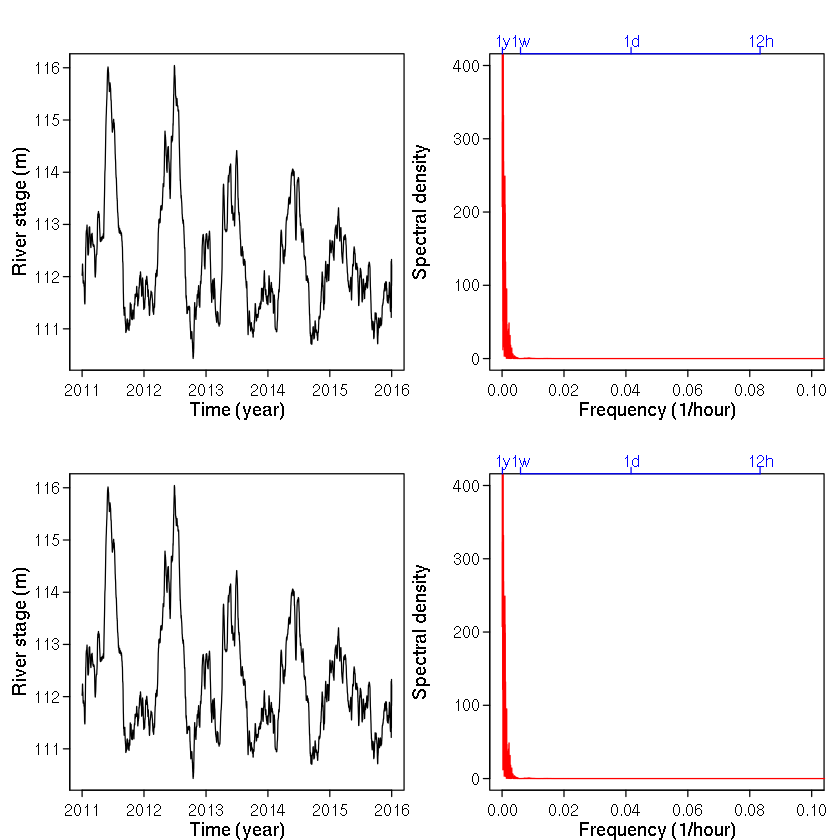

In [26]:
# pdf(file=fig_fft,width=10,height=6)
par(mar=c(2.5,3.5,2.7,0.8),mfrow=c(2, 2))

# plot(1,1)
plot(river_stage_7d$date, river_stage_7d$stage, col='black', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     type="l")

box()
mtext("River stage (m)",2,line=2)
mtext("Time (year)",1,line=1.5)
axis.POSIXct(1,at=time.ticks, format="%Y",tck=-0.02,mgp=c(1,0.5,0));
axis(2,seq(109,117,1),las=1,mgp=c(3,0.5,0),tck=-0.02);   

# plot(2,1)
plot(spy_7d~spx_7d,col="white",t="h",
     ylim=c(1e-1,4e2),
     xlim=c(1e-5,0.1),
     axes=FALSE,xlab=NA,ylab=NA,
#      log='y'
    )
box()

lines(spy_7d~spx_7d,col='red',lty=1, t="s")

# mtext(" (d) Spectral density of river stage",3,line=1.1,cex=1.2)
mtext("Frequency (1/hour)",1,line=1.5)
mtext("Spectral density",2,line=3)

axis(1,seq(0,0.5,0.02),tck=-0.02,mgp=c(1.5,0.5,0))
axis(2,tck=-0.02,mgp=c(1.5,0.5,0),las=2)
axis(3,
     c(1/12,1/24,1/24/7),col="blue",
     labels=c("12h","1d","1w"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.3,0.15,0))
axis(3,
     c(1/365/24),col="blue",
     labels=c("1y"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.5,0.15,0))

# plot(1,2)
plot(river_stage_1w$date, river_stage_1w$stage, col='black', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     type="l")

box()
mtext("River stage (m)",2,line=2)
mtext("Time (year)",1,line=1.5)
axis.POSIXct(1,at=time.ticks, format="%Y",tck=-0.02,mgp=c(1,0.5,0));
axis(2,seq(109,117,1),las=1,mgp=c(3,0.5,0),tck=-0.02);   

# plot(2,2)
plot(spy_1w~spx_1w,col="white",t="h",
     ylim=c(1e-1,4e2),
     xlim=c(1e-5,0.1),
     axes=FALSE,xlab=NA,ylab=NA,
#      log='y'
    )
box()

lines(spy_1w~spx_1w,col='red',lty=1, t="s")

# mtext(" (d) Spectral density of river stage",3,line=1.1,cex=1.2)
mtext("Frequency (1/hour)",1,line=1.5)
mtext("Spectral density",2,line=3)

axis(1,seq(0,0.5,0.02),tck=-0.02,mgp=c(1.5,0.5,0))
axis(2,tck=-0.02,mgp=c(1.5,0.5,0),las=2)
axis(3,
     c(1/12,1/24,1/24/7),col="blue",
     labels=c("12h","1d","1w"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.3,0.15,0))
axis(3,
     c(1/365/24),col="blue",
     labels=c("1y"),cex.axis=1,
     col.ticks="blue",
     col.axis="blue",tck=-0.02,mgp=c(1.5,0.15,0))

# dev.copy(jpeg, width=8,height=8,units='in',res=300, quality=100, file = fig_fft)
# dev.off()

# plot flux, river stage with FFT

In [149]:
fname = paste(fig_wavelet, "stage_flux_fft_mass183.eps", sep = "")
# pdf(file=fig_fft,width=10,height=6)
setEPS()
postscript(fname, height = 6, width=8)

par(mar=c(2.5,3.5,2.7,0.8),mfrow=c(2, 2))

# plot(1,1)
plot(river_stage_6h$date, river_stage_6h$stage, col='grey', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     type="l")

lines(river_stage_1w$date, river_stage_1w$stage, col='black', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     type="l")


box()
mtext("River stage (m)",2,line=2)
mtext("Time (year)",1,line=1.5)
axis.POSIXct(1,at=time.ticks, format="%Y",tck=-0.02,mgp=c(1,0.5,0));
axis(2,seq(100, 130, 1),las=1,mgp=c(3,0.5,0),tck=-0.02);   

legend("topright",legend = c("Sub-daily Case","Weekly Case"), col = c("grey", "black"), lty = c("solid", "solid"), bty = "n")

# plot(2,1)
plot(spy_6h~spx_6h,col="white",t="h",
     ylim=c(1e-1,3e2),
     xlim=c(1e-5,0.1),
     axes=FALSE,xlab=NA,ylab=NA,
#      log='y'
    )
box()

lines(spy_6h~spx_6h,col='grey',lty=1, t="s")
lines(spy_1w~spx_1w,col='black',lty=1, t="s")

# mtext(" (d) Spectral density of river stage",3,line=1.1,cex=1.2)
mtext("Frequency (cycle per hour)",1,line=1.5)
mtext("Spectral density",2,line=3)

axis(1,seq(0,0.5,0.02),tck=-0.02,mgp=c(1.5,0.5,0))
axis(2,tck=-0.02,mgp=c(1.5,0.5,0),las=2)
axis(3,
     c(1/12,1/24,1/24/7),col="black",
     labels=c("12h","1d","1w"),cex.axis=1,
     col.ticks="black",
     col.axis="black",tck=-0.02,mgp=c(1.3,0.15,0))
axis(3,
     c(1/365/24),col="black",
     labels=c("1y"),cex.axis=1,
     col.ticks="black",
     col.axis="black",tck=-0.02,mgp=c(1.5,0.15,0))

legend("topright",legend = c("Sub-daily Case","Weekly Case"), col = c("grey", "black"), lty = c("solid", "solid"), bty = "n")

# plot(1,2)
plot(flux_mass1_6h$date, flux_mass1_6h$flux, col='lightskyblue', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
     ylim = c(-0.2, 0.2),
     type="l")

box()

lines(flux_mass1_1w$date, flux_mass1_1w$flux, col='blue', 
     xlab="",
     ylab="",
     axes=FALSE, 
     xlim = c(start.time, end.time),
      ylim = c(-0.2, 0.2),
     type="l")


mtext("Exchange flux (m/d)",2,line=2)
mtext("Time (year)",1,line=1.5)
axis.POSIXct(1,at=time.ticks, format="%Y",tck=-0.02,mgp=c(1,0.5,0));
axis(2,seq(-0.2, 0.2, 0.1),las=1,mgp=c(3,0.5,0),tck=-0.02);   

legend("topright",legend = c("Sub-daily Case","Weekly Case"), col = c("lightskyblue", "blue"), lty = c("solid", "solid"), bty = "n")

# plot(2,2)
plot(flux_spy_6h~flux_spx_6h,col="white",t="h",
     ylim=c(1e-5,0.15),
     xlim=c(1e-5,0.1),
     axes=FALSE,xlab=NA,ylab=NA,
#      log='y'
    )
box()

lines(flux_spy_6h~flux_spx_6h,col='lightskyblue',lty=1, t="s")
lines(flux_spy_1w~flux_spx_1w,col='blue',lty=1, t="s")

# mtext(" (d) Spectral density of river stage",3,line=1.1,cex=1.2)
mtext("Frequency (cycle per hour)",1,line=1.5)
mtext("Spectral density",2,line=3)

axis(1,seq(0,0.5,0.02),tck=-0.02,mgp=c(1.5,0.5,0))
axis(2,tck=-0.02,mgp=c(1.5,0.5,0),las=2)
axis(3,
     c(1/12,1/24,1/24/7),col="black",
     labels=c("12h","1d","1w"),cex.axis=1,
     col.ticks="black",
     col.axis="black",tck=-0.02,mgp=c(1.3,0.15,0))
axis(3,
     c(1/365/24),col="black",
     labels=c("1y"),cex.axis=1,
     col.ticks="black",
     col.axis="black",tck=-0.02,mgp=c(1.5,0.15,0))

legend("topright",legend = c("Sub-daily Case","Weekly Case"), col = c("lightskyblue", "blue"), lty = c("solid", "solid"), bty = "n")

# dev.copy(jpeg, width=8,height=8,units='in',res=300, quality=100, file = fig_fft)
dev.off()

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”

png 
  2

# Wavelet analysis for river stage

Also see package "WaveletComp" [manual](https://cran.r-project.org/web/packages/WaveletComp/WaveletComp.pdf) and [tutorial](http://www.hs-stat.com/projects/WaveletComp/WaveletComp_guided_tour.pdf)

**note: the plotting function in jupyter is not working well, to make the plot, use Rstudio**

In [6]:
loess.span = 0 ##loess smooth controller; no detrending
dt = 1/24 ## time unit in days in case of hourly data, i.e. 24 obs per time unit (1 d)
dj =1/13 ## frequency resolution. 1/dj = number of suboctaves
lowerPeriod =  1/4 #lowest period of 1/4 day
upperPeriod = 365   #highest peirod of 365 day
make.pval = T    # compute p value
method = 'white.noise'    # 'white.noise'(default),'shuffle','Fourier.rand','AR','ARIMA'
n.sim=  10  # number of simulation default 100
gapthreshold = 0.1 ##gap period/total length

**using wavelet**

In [30]:
well_data = well_df_data

In [22]:
well_data = river_stage_6h
names(well_data) = c('date', 'stage')

In [31]:
cwt.data = analyze.wavelet(well_data, "stage",loess.span=loess.span,dt=dt,dj=dj,
                           lowerPeriod=lowerPeriod ,make.pval=make.pval, method=method,
                           n.sim=n.sim,upperPeriod=upperPeriod)

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


## plot river stage, wavelet spectrum and average wavelet power

In [48]:
iwell= "river stage (6h)"

fig = paste(fig_wavelet, "wavelet_stage_6h.jpg", sep = "")

# jpeg(fig, units='in',width=8,height=8,quality=100,res=300)

outer_mar = c(2,2,2,1)

split.screen(rbind(c(0.1, 0.7, 0.7, 1), c(0.1, 0.7, 0.1, 0.68), c(0.72, 1, 0.1, 0.68)))

screen(1)
par(mar=c(0,0,0,0), oma=outer_mar)
# plot river stage
plot(well_data$date, well_data$stage, type='l', xlab='',ylab="River stage (m)", 
     xlim = c(start.time, end.time), tcl = -0.3, xaxs = "i", xaxt = 'n')

axis(side=1, at = time.ticks, labels=F) 

mtext("River stage (m)", side=2, line=-0.5, cex=1, col="black", outer=TRUE, adj = 0, at = 0.75)  
mtext(paste("Wavelet analysis for ", iwell, sep = ""), side=3, line=1, cex=1, col="blue", outer=TRUE)  




screen(2)
# plot power spectrum
par(mar=c(0,0,0,0), oma=outer_mar)
wt.image(cwt.data, my.series = 1, plot.coi = T, plot.contour = F, 
         siglvl = 0.9, col.contour = "gray", plot.ridge = F, lvl = 0, 
         col.ridge = "black", color.key = "quantile", n.levels = 100, 
         color.palette = "rainbow(n.levels, start=0, end=.7)", useRaster = T, 
         max.contour.segments = 250000, plot.legend = F, 
         legend.params = list(width = 1.2, shrink = 1, mar = 5.1, n.ticks = 6, label.digits = 2, 
                             label.format = "f", lab ="Wavelet power levels (quantiles)", lab.line = 2), 
         label.time.axis = T, show.date = T, date.format = "%Y", date.tz = "GMT", timelab = "Year", timetck = NA, timetcl = -0.3,
         spec.time.axis = list(at = time.ticks, labels = time.tick.labels),
         label.period.axis = T, periodlab = 'Period (days)', periodtcl = -0.3, lwd = 0.5, graphics.reset = T, 
         verbose = F) 

screen(3)
# plot average wavelet power
par(mar=c(0,0,0,0), oma=outer_mar)
wt.avg(cwt.data, show.siglvl = F, label.avg.axis = T, label.period.axis = F, averagelab = "Average wavelet power", 
       # yaxt = 'n',
       periodlab = "Period (days)", averagetcl = -0.3, periodtcl = -0.3, show.legend = F, lwd = 1, col = "red")

close.screen(all.screens = T)

# dev.copy(jpeg, width=8,height=8,units='in',res=300, quality=100, file = fig)
# dev.off()

# Wavelet analysis for flux

In [53]:
loess.span = 0 ##loess smooth controller; no detrending
dt = 6/24 ## time unit in days in case of 6-hourly data, i.e. 4 obs per time unit (1 d)
dj =1/13 ## frequency resolution. 1/dj = number of suboctaves
lowerPeriod =  1/4 #lowest period of 1/4 day
upperPeriod = 365   #highest peirod of 365 day
make.pval = T    # compute p value
method = 'white.noise'    # 'white.noise'(default),'shuffle','Fourier.rand','AR','ARIMA'
n.sim=  10  # number of simulation default 100
gapthreshold = 0.1 ##gap period/total length

In [55]:
cwt.data = analyze.wavelet(flux_mass50_6h, "flux",loess.span=loess.span,dt=dt,dj=dj,
                           lowerPeriod=lowerPeriod ,make.pval=make.pval, method=method,
                           n.sim=n.sim,upperPeriod=upperPeriod)

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


[1] 1 2 3

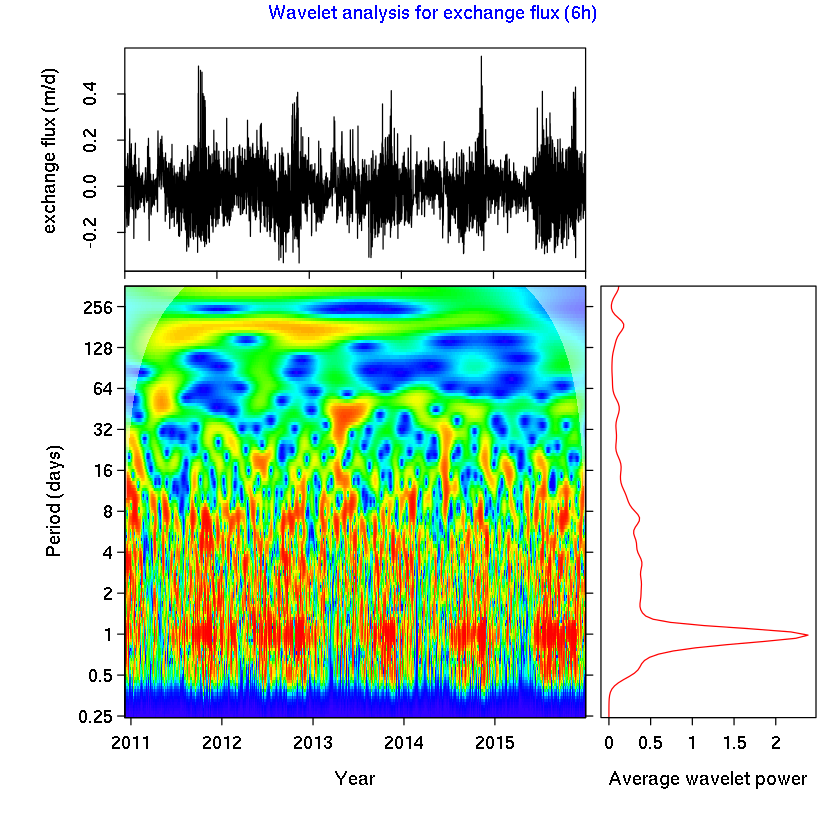

In [57]:
well_data = flux_mass50_6h

iwell= "exchange flux (6h)"

fig = paste(fig_wavelet, "wavelet_flux_6h.jpg", sep = "")

# jpeg(fig, units='in',width=8,height=8,quality=100,res=300)

outer_mar = c(2,2,2,1)

split.screen(rbind(c(0.1, 0.7, 0.7, 1), c(0.1, 0.7, 0.1, 0.68), c(0.72, 1, 0.1, 0.68)))

screen(1)
par(mar=c(0,0,0,0), oma=outer_mar)
# plot river stage
plot(well_data$date, well_data$flux, type='l', xlab='',ylab="River stage (m)", 
     xlim = c(start.time, end.time), tcl = -0.3, xaxs = "i", xaxt = 'n')

axis(side=1, tcl = -0.3, at = time.ticks, labels=F) 

mtext("exchange flux (m/d)", side=2, line=-0.5, cex=1, col="black", outer=TRUE, adj = 0, at = 0.75)  
mtext(paste("Wavelet analysis for ", iwell, sep = ""), side=3, line=1, cex=1, col="blue", outer=TRUE)  




screen(2)
# plot power spectrum
par(mar=c(0,0,0,0), oma=outer_mar)
wt.image(cwt.data, my.series = 1, plot.coi = T, plot.contour = F, 
         siglvl = 0.9, col.contour = "gray", plot.ridge = F, lvl = 0, 
         col.ridge = "black", color.key = "quantile", n.levels = 100, 
         color.palette = "rainbow(n.levels, start=0, end=.7)", useRaster = T, 
         max.contour.segments = 250000, plot.legend = F, 
         legend.params = list(width = 1.2, shrink = 1, mar = 5.1, n.ticks = 6, label.digits = 2, 
                             label.format = "f", lab ="Wavelet power levels (quantiles)", lab.line = 2), 
         label.time.axis = T, show.date = T, date.format = "%Y", date.tz = "GMT", timelab = "Year", timetck = NA, timetcl = -0.3,
         spec.time.axis = list(at = time.ticks, labels = time.tick.labels),
         label.period.axis = T, periodlab = 'Period (days)', periodtcl = -0.3, lwd = 0.5, graphics.reset = T, 
         verbose = F) 

screen(3)
# plot average wavelet power
par(mar=c(0,0,0,0), oma=outer_mar)
wt.avg(cwt.data, show.siglvl = F, label.avg.axis = T, label.period.axis = F, averagelab = "Average wavelet power", 
       # yaxt = 'n',
       periodlab = "Period (days)", averagetcl = -0.3, periodtcl = -0.3, show.legend = F, lwd = 1, col = "red")

close.screen(all.screens = T)

# dev.copy(jpeg, width=8,height=8,units='in',res=300, quality=100, file = fig)
# dev.off()

[1] 1 2 3

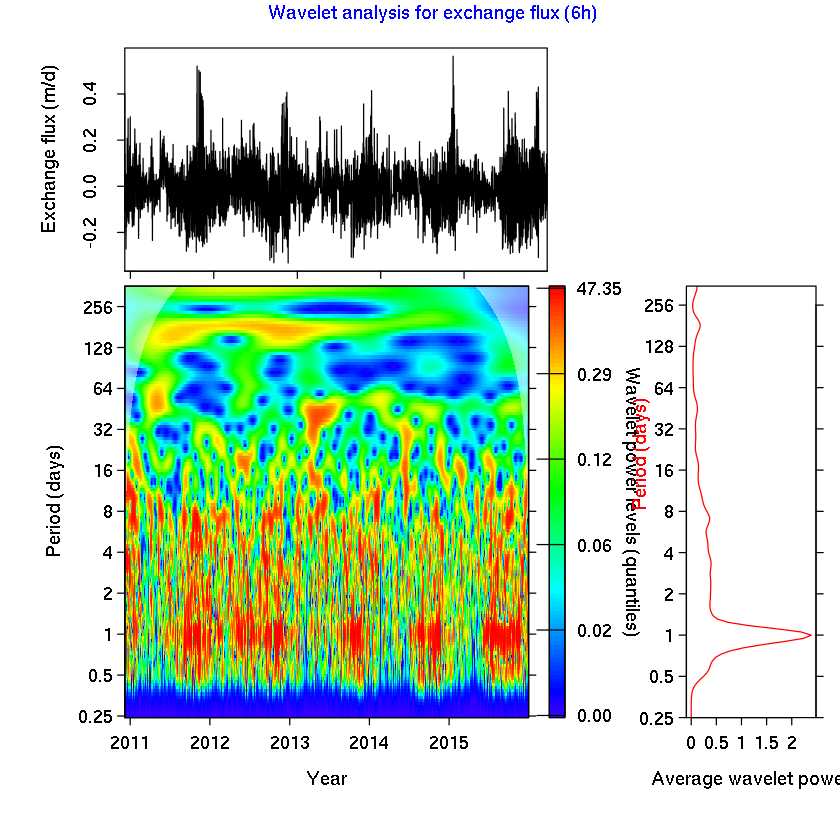

In [58]:
# jpeg(fig, units='in',width=10,height=8,quality=100,res=300)

outer_mar = c(2,2,2,1)

split.screen(rbind(c(0.1, 0.65, 0.7, 1), c(0.1, 0.7, 0.1, 0.68), c(0.8, 1, 0.1, 0.68)))

screen(1)
par(mar=c(0,0,0,0), oma=outer_mar)
# plot river stage
plot(well_data$date, well_data$flux, type='l', xlab='',ylab="River stage (m)", 
     # xlim = c(start.time, end.time), 
     tcl = -0.3, xaxs = "i", xaxt = 'n')

axis(side=1, tcl = -0.3, at = time.ticks, labels=F) 

mtext("Exchange flux (m/d)", side=2, line=-0.5, cex=1, col="black", outer=TRUE, adj = 0, at = 0.75)  
mtext(paste("Wavelet analysis for ", iwell, sep = ""), side=3, line=1, cex=1, col="blue", outer=TRUE)  




screen(2)
# plot power spectrum
par(mar=c(0,0,0,2), oma=outer_mar)
wt.image(cwt.data, my.series = 1, plot.coi = T, plot.contour = F, 
         siglvl = 0.9, col.contour = "gray", plot.ridge = F, lvl = 0, 
         col.ridge = "black", color.key = "quantile", n.levels = 100, 
         color.palette = "rainbow(n.levels, start=0, end=.7)",
         # color.palette = "gray((n.levels):1/n.levels)",
         useRaster = T, 
         max.contour.segments = 250000, plot.legend = T, 
         legend.params = list(width = 1.5, shrink = 1, mar = 2, n.ticks = 6, label.digits = 2, 
                              label.format = "f", lab ="Wavelet power levels (quantiles)", lab.line = 2), 
         label.time.axis = T, show.date = T, date.format = "%Y", date.tz = "GMT", timelab = "Year", timetck = NA, timetcl = -0.3,
         spec.time.axis = list(at = time.ticks, labels = time.tick.labels),
         label.period.axis = T, periodlab = 'Period (days)', periodtcl = -0.3, lwd = 0.5, graphics.reset = T, 
         verbose = F) 

# axis(side=2, tcl = -0.3, at=as.character(-2:8), labels=T) 

screen(3)
# plot average wavelet power
par(mar=c(0,1,0,0), oma=outer_mar)
wt.avg(cwt.data, show.siglvl = F, label.avg.axis = T, label.period.axis = T, averagelab = "Average wavelet power", 
       # yaxt = 'n',
       # xlim=c(0,2.5),
       periodlab = "", averagetcl = -0.3, periodtcl = -0.3, show.legend = F, lwd = 1, col = "red")

# axis(side=2, tcl = -0.3, at=as.character(-2:8), labels=F) 
mtext("Period (days)", side=2, line=1.5, cex=1, col="red", outer=F, adj = 0, at = 3)  

close.screen(all.screens = T)

# dev.copy(jpeg, width=8,height=8,units='in',res=300, quality=100, file = fig)
# dev.off()